In [1]:
import nltk, nltk.classify.util, nltk.metrics
# nltk.download('movie_reviews')
from nltk.classify import MaxentClassifier
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.probability import FreqDist, ConditionalFreqDist
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
from nltk.classify import SklearnClassifier

from nltk.classify import MaxentClassifier
from nltk.corpus import movie_reviews

def word_feats(words):
    return dict([(word, True) for word in words])

negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')

negfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in negids]
posfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in posids]

negcutoff = len(negfeats)*3//4
poscutoff = len(posfeats)*3//4

trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]
#classifier = nltk.MaxentClassifier.train(trainfeats)

# algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]
# classifier = nltk.MaxentClassifier.train(trainfeats, algorithm,max_iter=5)

# classifier.show_most_informative_features(10)

# all_words = nltk.FreqDist(word for word in movie_reviews.words())
# top_words = set(all_words.keys()[:300])

In [2]:
import pickle
import numpy as np

In [3]:
with open('mnist_temp_act_full1.pkl','rb') as f:
    action_records1,labels1 = pickle.load(f)
with open('mnist_temp_act_full2.pkl','rb') as f:
    action_records2,labels2 = pickle.load(f)
action_records   = action_records1 + action_records2


from mnist import MNIST

mnist = MNIST('/home/bnapp/datasets/mnist/')

_, labels = mnist.load_training()



In [4]:
images, labels = mnist.load_training()


In [18]:
len(action_records)

60000

In [6]:
def prep_n_grams(x,n=None,offsets=None):
    if (n is None) and  not (offsets is None):
        pass
    elif not(n is None) and (offsets is None):
        offsets = list(range(n))
    else:
        error('need to provide either n or offsets')
    ngram_dict = {}
    for ii in range(len(x)-offsets[-1]):
        this_ngram = tuple(x[ii+oo] for oo in offsets)
        if this_ngram in ngram_dict.keys():
            ngram_dict[this_ngram] +=1
        else:
            ngram_dict[this_ngram] = 1
    return ngram_dict

ngram_records=[prep_n_grams(aa,offsets=[0,3,6,9,12]) for aa in action_records]

train_data=[(x,y) for x,y in zip(ngram_records[:3500],labels[:3500])]

classifier = SklearnClassifier(SVC(), sparse=False).train(train_data)

    val_labels=classifier.classify_many(ngram_records[3500:])
    aa=[x==y for x,y in zip(val_labels,labels[3500:])]
    print(np.mean(aa))

In [13]:
# ngram4_records=[prep_n_grams(aa,offsets=[0,2,4,6,8]) for aa in action_records]
lagfac=2
ngram4_records=[prep_n_grams(aa,offsets=[0*lagfac,4*lagfac,8*lagfac,12*lagfac]) for aa in action_records]

In [14]:
train_data4=[(x,y) for x,y in zip(ngram4_records[:55000],labels[:55000])]

In [15]:
classifier4 = SklearnClassifier(LogisticRegression(), sparse=False).train(train_data4)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
    val_labels4=classifier4.classify_many(ngram4_records[55000:])
    aa=[x==y for x,y in zip(val_labels4,labels[55000:])]
    print(np.mean(aa))

0.7096


In [11]:
classifier4._

AttributeError: 'SklearnClassifier' object has no attribute '_'

In [31]:
import matplotlib.pyplot as plt

In [17]:
conf_map=np.zeros([10,10])
for x,y in zip(val_labels4,labels[55000:]):
    conf_map[x,y] += 1
    

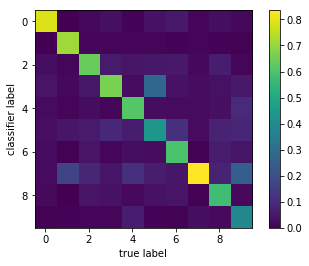

In [18]:
plt.imshow(conf_map/np.sum(conf_map,axis=0))
plt.xlabel('true label')
plt.ylabel('classifier label')
plt.colorbar()

In [46]:
conf_map

array([[42.,  1.,  6., 13.,  8., 13., 11.,  3., 10.,  5.],
       [ 2., 53.,  7.,  8.,  5.,  8.,  5., 13.,  4., 10.],
       [ 4.,  1., 26.,  8.,  4.,  6.,  6.,  4., 12.,  3.],
       [ 4.,  0.,  6., 16.,  0., 11.,  0.,  3.,  2.,  0.],
       [ 0.,  2.,  6.,  5., 19.,  6.,  5.,  6., 13.,  7.],
       [ 0.,  0.,  2.,  2.,  0.,  4.,  0.,  1.,  0.,  0.],
       [ 3.,  0.,  3.,  0.,  5.,  1., 31.,  2., 14.,  9.],
       [ 1.,  7.,  0.,  1.,  1.,  1.,  0., 29.,  0., 16.],
       [ 0.,  0.,  2.,  1.,  2.,  0.,  6.,  0.,  8.,  1.],
       [ 0.,  1.,  0.,  0.,  5.,  0.,  1.,  3.,  3., 18.]])

In [49]:
conf_map/np.sum(conf_map,axis=1)

array([[0.375     , 0.00869565, 0.08108108, 0.30952381, 0.11594203,
        1.44444444, 0.16176471, 0.05357143, 0.5       , 0.16129032],
       [0.01785714, 0.46086957, 0.09459459, 0.19047619, 0.07246377,
        0.88888889, 0.07352941, 0.23214286, 0.2       , 0.32258065],
       [0.03571429, 0.00869565, 0.35135135, 0.19047619, 0.05797101,
        0.66666667, 0.08823529, 0.07142857, 0.6       , 0.09677419],
       [0.03571429, 0.        , 0.08108108, 0.38095238, 0.        ,
        1.22222222, 0.        , 0.05357143, 0.1       , 0.        ],
       [0.        , 0.0173913 , 0.08108108, 0.11904762, 0.27536232,
        0.66666667, 0.07352941, 0.10714286, 0.65      , 0.22580645],
       [0.        , 0.        , 0.02702703, 0.04761905, 0.        ,
        0.44444444, 0.        , 0.01785714, 0.        , 0.        ],
       [0.02678571, 0.        , 0.04054054, 0.        , 0.07246377,
        0.11111111, 0.45588235, 0.03571429, 0.7       , 0.29032258],
       [0.00892857, 0.06086957, 0.       

In [17]:
    train_labels4=classifier4.classify_many(ngram4_records[:55000])
    aatr=[x==y for x,y in zip(train_labels4,labels[:55000])]
    print(np.mean(aatr))

0.767090909090909


In [15]:
with open('classifiers_logits_l2_74.pkl','wb') as f:
    pickle.dump(classifier4,f)

In [16]:
 print(np.mean(aa))

0.7404


In [18]:
with open('pixel_correctness.pkl','rb') as f:
    aa_px=pickle.load(f)

In [22]:
np.mean(np.array(aa)[aa_px])

0.7620985010706638

In [24]:
np.mean(np.array(aa)[(not uu) for uu in aa_px])

SyntaxError: invalid syntax (<ipython-input-24-2a5702131b6b>, line 1)

In [26]:
zz=[(not uu) for uu in aa_px]

In [27]:
np.mean(np.array(aa)[zz])

0.43333333333333335

In [41]:
zz2=[(not uu) for uu in aa]
np.mean(np.array(aa_px)[zz2])

0.8559322033898306

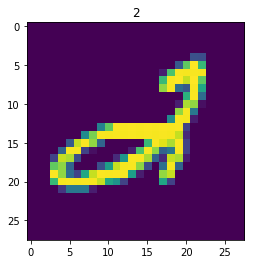

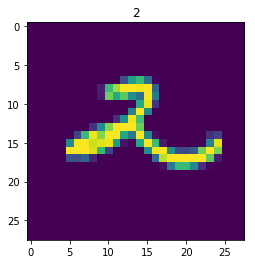

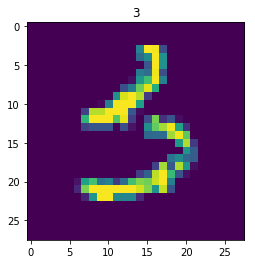

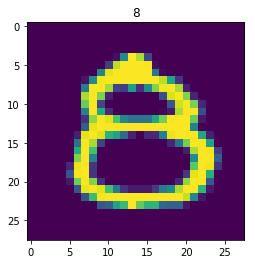

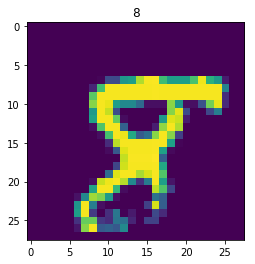

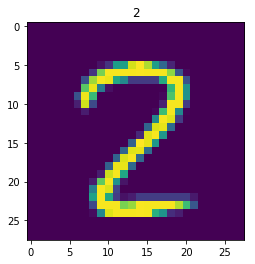

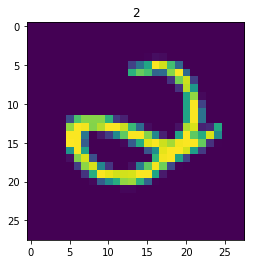

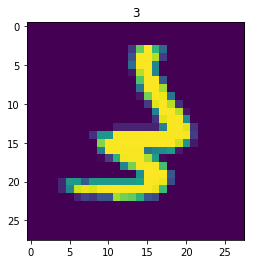

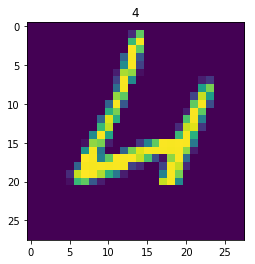

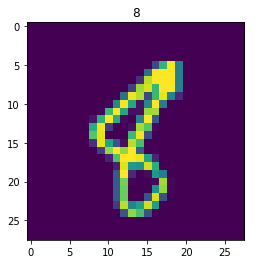

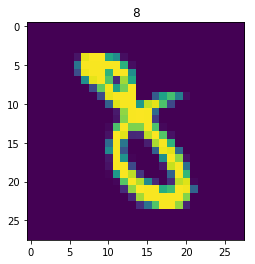

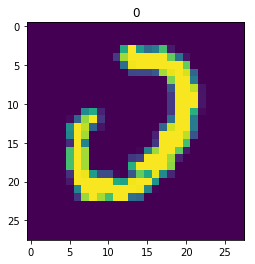

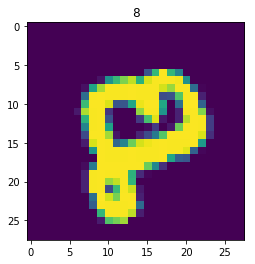

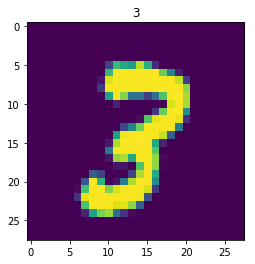

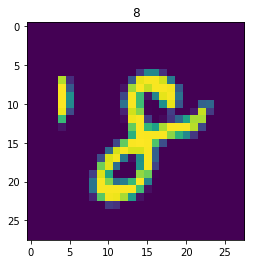

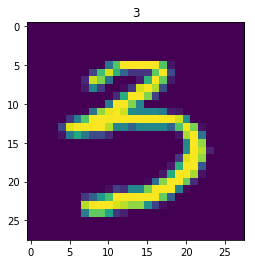

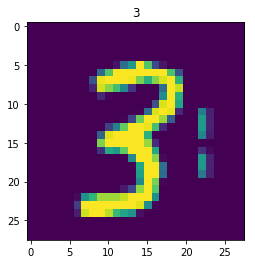

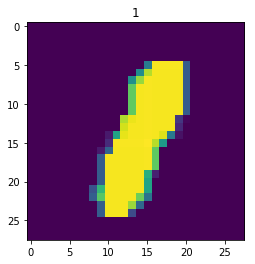

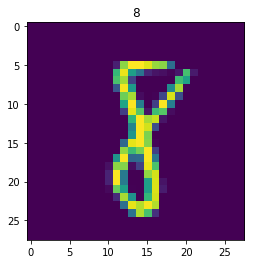

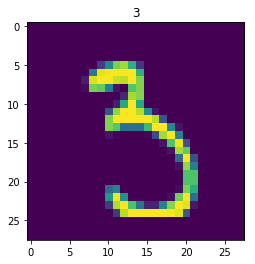

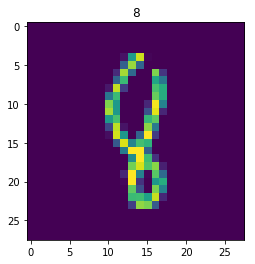

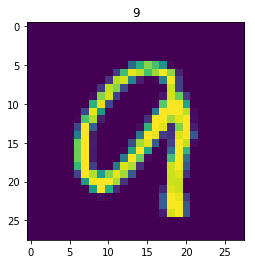

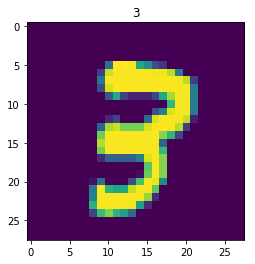

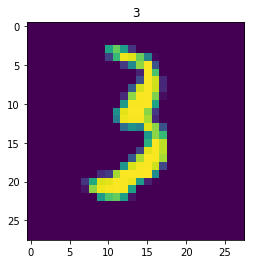

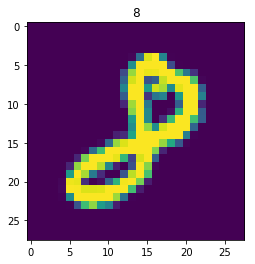

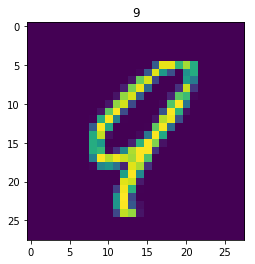

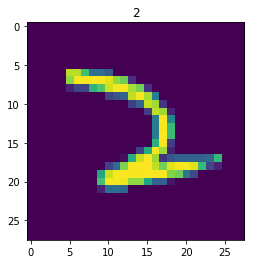

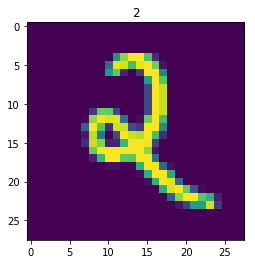

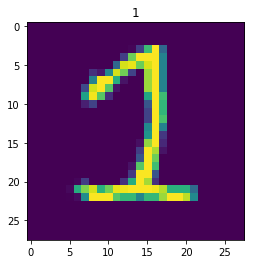

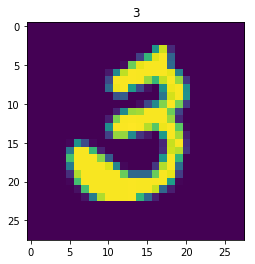

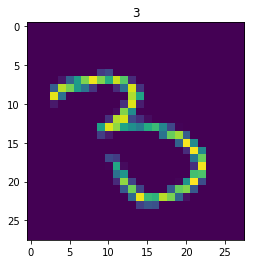

In [42]:
#syclop correct pixels confused
cnt=0
for ii,correct1 in enumerate(aa_px):
    if not correct1 and aa[ii]:
        plt.figure()
        plt.imshow(np.reshape(images[55000+ii],[28,28]))
        plt.title(str(labels[55000+ii]))
        cnt += 1
    if cnt>30:
        break

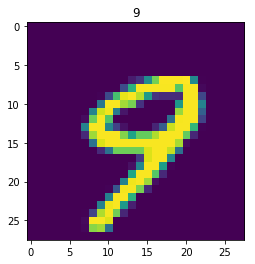

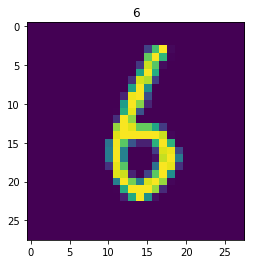

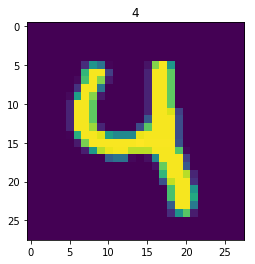

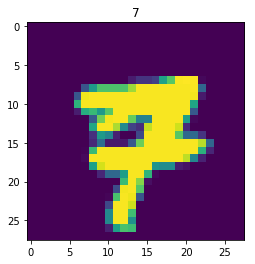

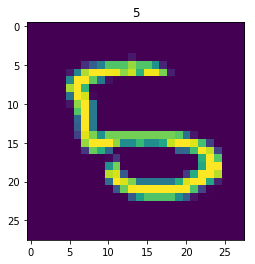

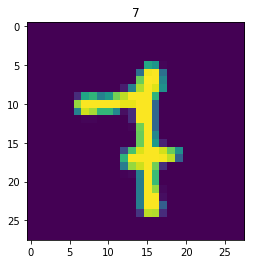

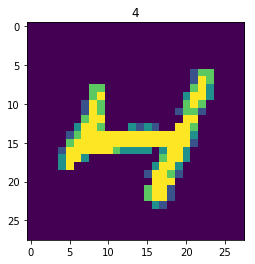

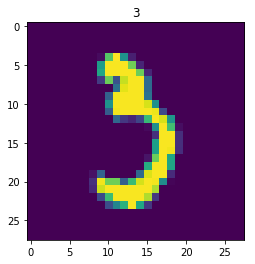

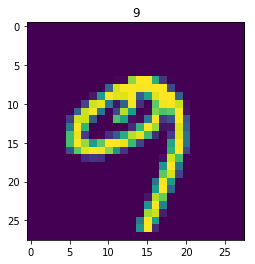

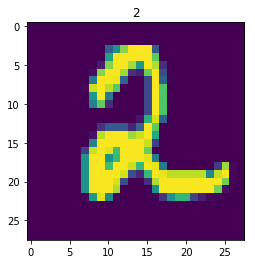

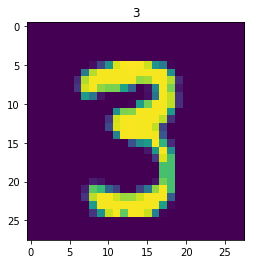

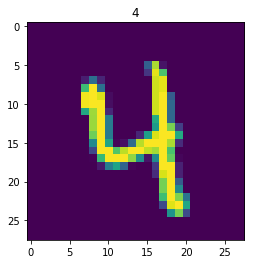

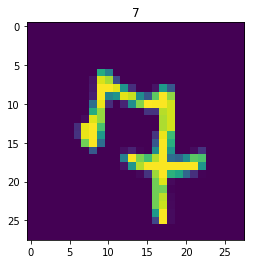

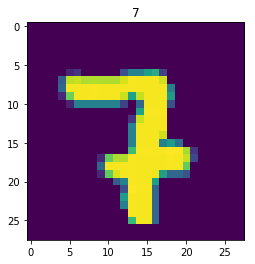

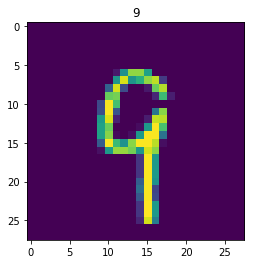

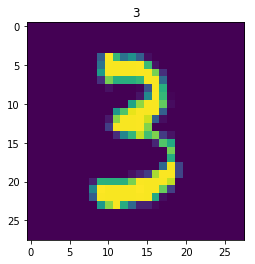

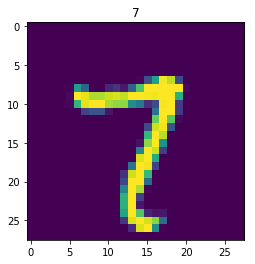

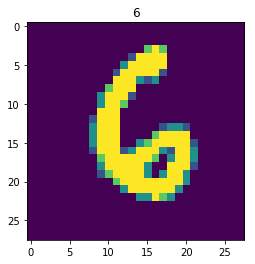

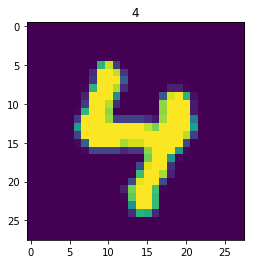

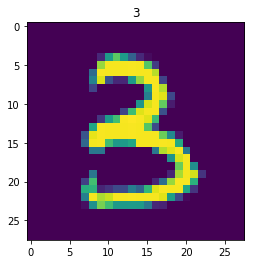

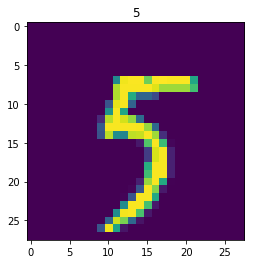

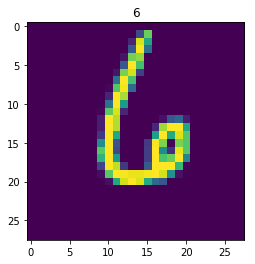

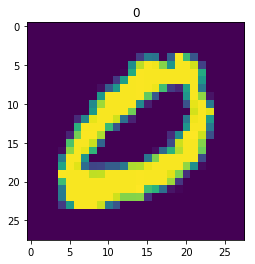

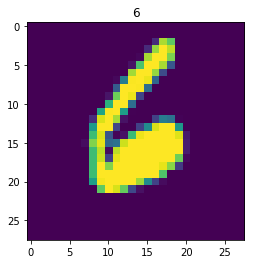

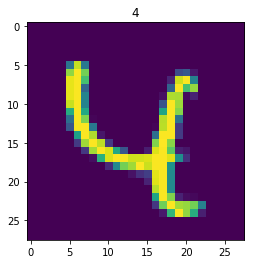

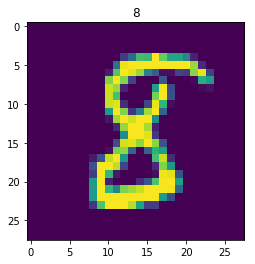

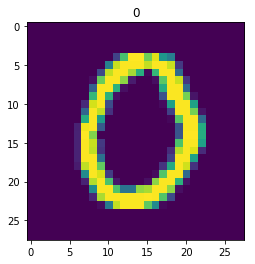

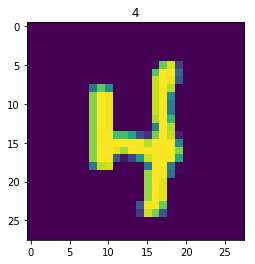

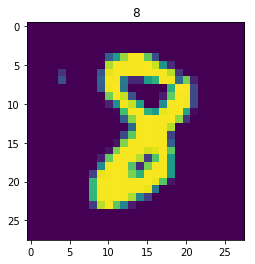

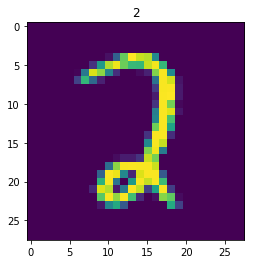

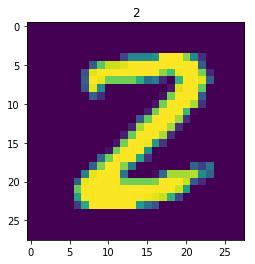

In [43]:
#syclop confused pixels correct
cnt=0
for ii,correct1 in enumerate(aa_px[:300]):
    if  correct1 and not aa[ii]:
        plt.figure()
        plt.imshow(np.reshape(images[55000+ii],[28,28]))
        plt.title(str(labels[55000+ii]))
        cnt += 1
    if cnt>30:
        break

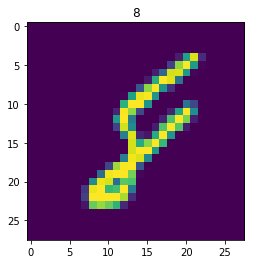

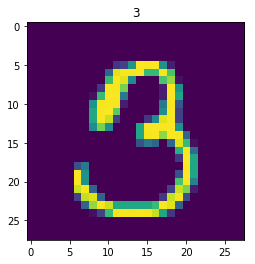

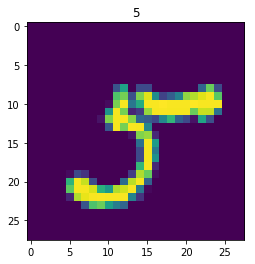

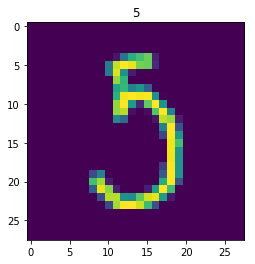

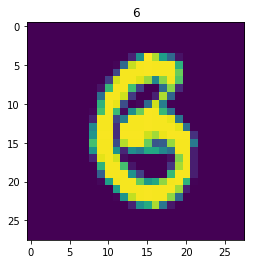

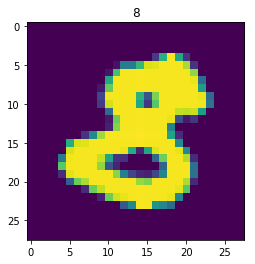

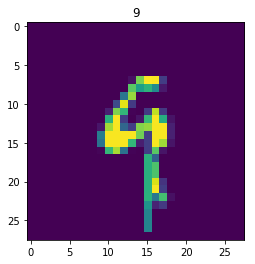

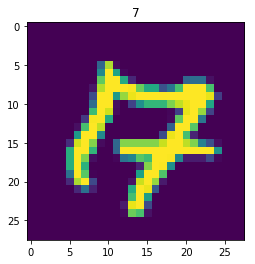

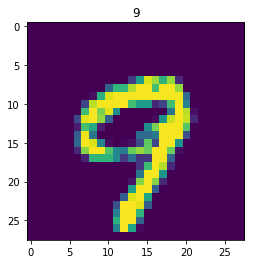

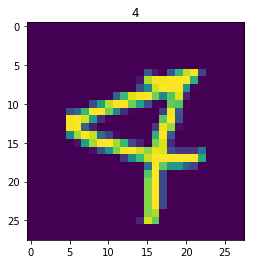

In [39]:
#both confused
for ii,correct1 in enumerate(aa_px[:300]):
    if  not correct1 and not aa[ii]:
        plt.figure()
        plt.imshow(np.reshape(images[55000+ii],[28,28]))
        plt.title(str(labels[55000+ii]))